In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn import metrics

# Loading the data

In [42]:
boston_df = load_boston()

In [54]:
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [46]:
df = pd.DataFrame(boston_df.data, columns = boston_df.feature_names)

In [49]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [50]:
df.shape

(506, 13)

In [52]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [55]:
X = df
Y = boston_df.target

In [56]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [59]:
print(X.head())
print('-'*10)
print(Y[0:10])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
----------
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


# Splitting the data

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


# Building the model

In [61]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [63]:
mlr.coef_

array([-1.53004848e-01,  4.79388437e-02, -8.60131597e-03,  2.57986675e+00,
       -1.46325645e+01,  3.96283436e+00, -7.92357629e-03, -1.46078023e+00,
        3.45431204e-01, -1.24503134e-02, -9.19092768e-01,  1.32203623e-02,
       -5.17255347e-01])

In [82]:
mlr.intercept_

32.214120389743634

In [93]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(mlr.coef_))], axis = 1)
coefficients

,0,0
0,CRIM,-0.153005
1,ZN,0.047939
2,INDUS,-0.008601
3,CHAS,2.579867
4,NOX,-14.632565
5,RM,3.962834
6,AGE,-0.007924
7,DIS,-1.460780
8,RAD,0.345431
9,TAX,-0.012450


# Predicting the test data

In [62]:
y_pred = mlr.predict(X_test)

In [81]:
y_pred[:10]

array([37.65716228, 32.10182066, 27.00805665,  6.21330952, 35.48599012,
        5.3969642 , 27.45058566, 31.5929573 , 26.46993857, 22.91434378])

# Visualization

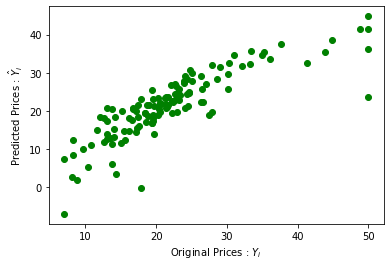

In [73]:
plt.scatter(y_test, y_pred, color = 'g')
plt.xlabel("Original Prices : $Y_i$")
plt.ylabel("Predicted Prices : $\hat{Y}_i$")

plt.show()

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


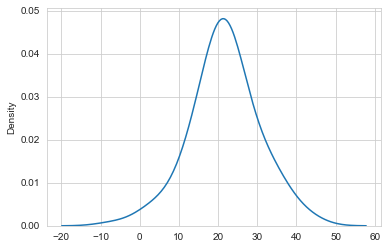

In [78]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.show()

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


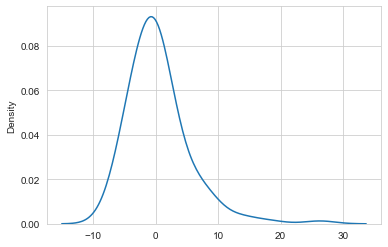

In [79]:
delta_y = y_test - y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

# Evaluation Metrics

In [88]:
print('R^2 value - {}'.format(metrics.r2_score(y_test, y_pred)))

R^2 value - 0.7059096071098048


In [89]:
print('MSE value - {}'.format(metrics.mean_squared_error(y_test, y_pred)))

MSE value - 24.27460831168788


In [90]:
print('MAE value - {}'.format(metrics.mean_absolute_error(y_test, y_pred)))

MAE value - 3.2900183526885503


In [91]:
print('Root Mean Squared value - {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Squared value - 4.92692686283122
